In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

In [2]:
import pandas as pd 
import numpy as np 
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/PROJECT/HEART%20DISEASE/heart_disease_uci.csv')

In [ ]:
df.columns 

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### <span style="color:cyan"><i>Data Cleaning</i></span>

In [5]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']
categorical_cols_most_missing = ['fbs', 'thal', 'slope', 'exang']
categorical_cols_mcar = ['restecg']

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca' ]
missing_numerical_cols_mcar = ['trestbps', 'chol']
missing_numerical_cols_not_mcar = ['thalch', 'oldpeak']
not_zero_cols = ['chol', 'trestbps']


#### Handling those columns whose values can not be zero or negerive.

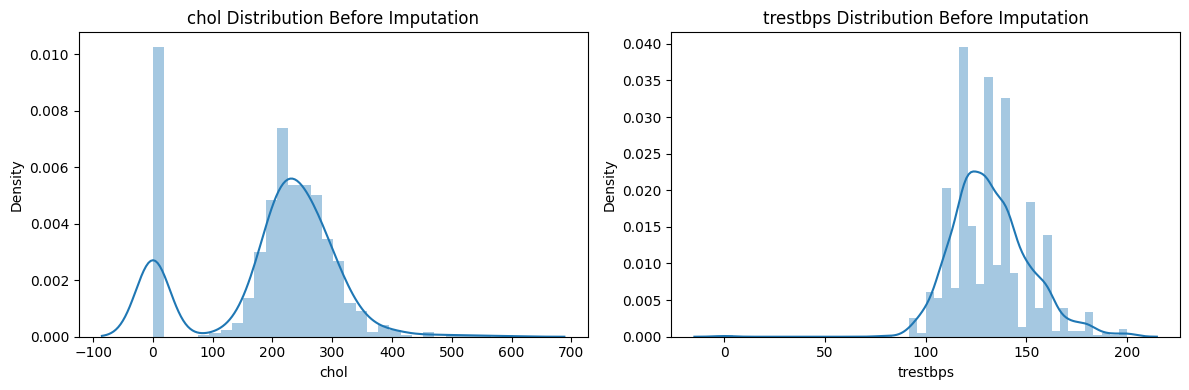

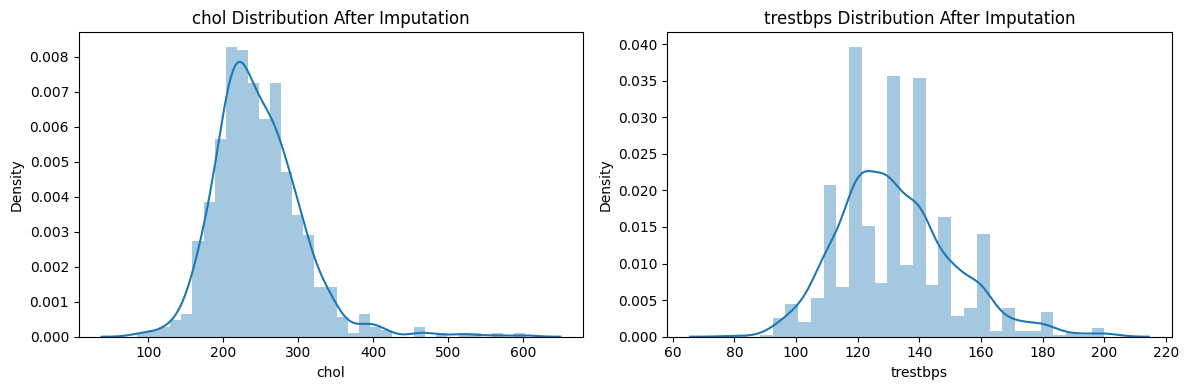

In [6]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(not_zero_cols), figsize=(12, 4))

# Loop through each column and create a distplot
for i, col in enumerate(not_zero_cols):
    sns.distplot(df[col], ax=axs[i])

# Set the title and labels for each subplot
for i, col in enumerate(not_zero_cols):
    axs[i].set_title(f'{col} Distribution Before Imputation')

# Layout so plots do not overlap
fig.tight_layout()

# Making all the zero values to NaN then plotting the distributions curve
fig, axs = plt.subplots(1, len(not_zero_cols), figsize=(12, 4))

# Loop through each column and create a distplot
for i, col in enumerate(not_zero_cols):
    df[col] = df[col].replace(0, np.nan)
    sns.distplot(df[col], ax=axs[i])

# Set the title and labels for each subplot
for i, col in enumerate(not_zero_cols):
    axs[i].set_title(f'{col} Distribution After Imputation')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


#### Handling columns in <i>missing_numerical_mcar</i>

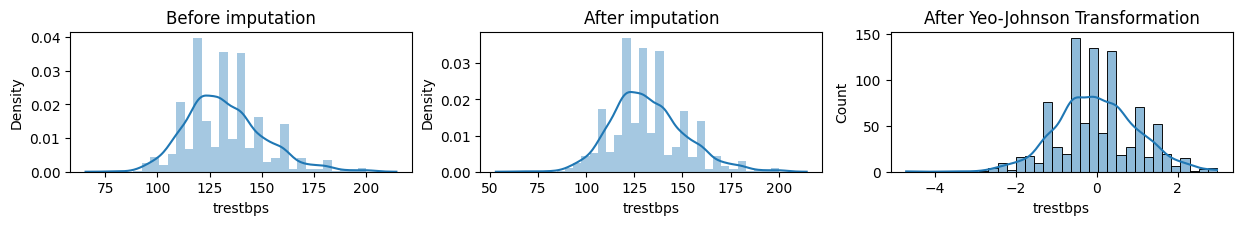

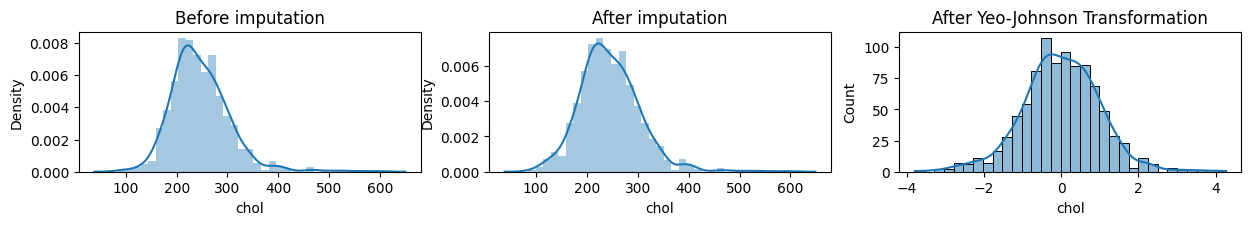

In [7]:
# Befroe imputation
plt.figure(figsize=(15, 4))
plt.subplot(2, 3, 1)
sns.distplot(df['trestbps'])    
plt.title('Before imputation')

# Impute missing cholesterol values by generating random samples from a normal distribution
# that matches the observed data's mean and slightly increased standard deviation (1.1x),
# while preserving the original DataFrame's index structure to ensure correct alignment.
mean_val, std_val = df['trestbps'].mean(), df['trestbps'].std()
imputed_vals = pd.Series(
    np.random.normal(mean_val, std_val * 1.1, size=df['trestbps'].isna().sum()),
    index=df[df['trestbps'].isna()].index  # Preserve original indices
)
df['trestbps'] = df['trestbps'].fillna(imputed_vals)    # Random imputation from mean and std

# After imputation
plt.subplot(2, 3, 2)
sns.distplot(df['trestbps'])
plt.title('After imputation')

# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['trestbps'] = pt.fit_transform(df[['trestbps']])

# Plot the transformed data
plt.subplot(2, 3, 3)
sns.histplot(df['trestbps'], kde=True)  # Replaces distplot
plt.title('After Yeo-Johnson Transformation')
plt.show()

# Same for the chol column

# Befroe imputation
plt.figure(figsize=(15, 4))
plt.subplot(2, 3, 1)
sns.distplot(df['chol'])    
plt.title('Before imputation')

# Impute missing cholesterol values by generating random samples from a normal distribution
# that matches the observed data's mean and slightly increased standard deviation (1.1x),
# while preserving the original DataFrame's index structure to ensure correct alignment.
mean_val, std_val = df['chol'].mean(), df['chol'].std()
imputed_vals = pd.Series(
    np.random.normal(mean_val, std_val * 1.1, size=df['chol'].isna().sum()),
    index=df[df['chol'].isna()].index  # Preserve original indices
)
df['chol'] = df['chol'].fillna(imputed_vals)# Random imputation from mean and std

# After imputation
plt.subplot(2, 3, 2)
sns.distplot(df['chol'])
plt.title('After imputation')

# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['chol'] = pt.fit_transform(df[['chol']])

# Plot the transformed data
plt.subplot(2, 3, 3)
sns.histplot(df['chol'], kde=True)  # Replaces distplot
plt.title('After Yeo-Johnson Transformation')
plt.show()


##### Scaling the numerical colulmns

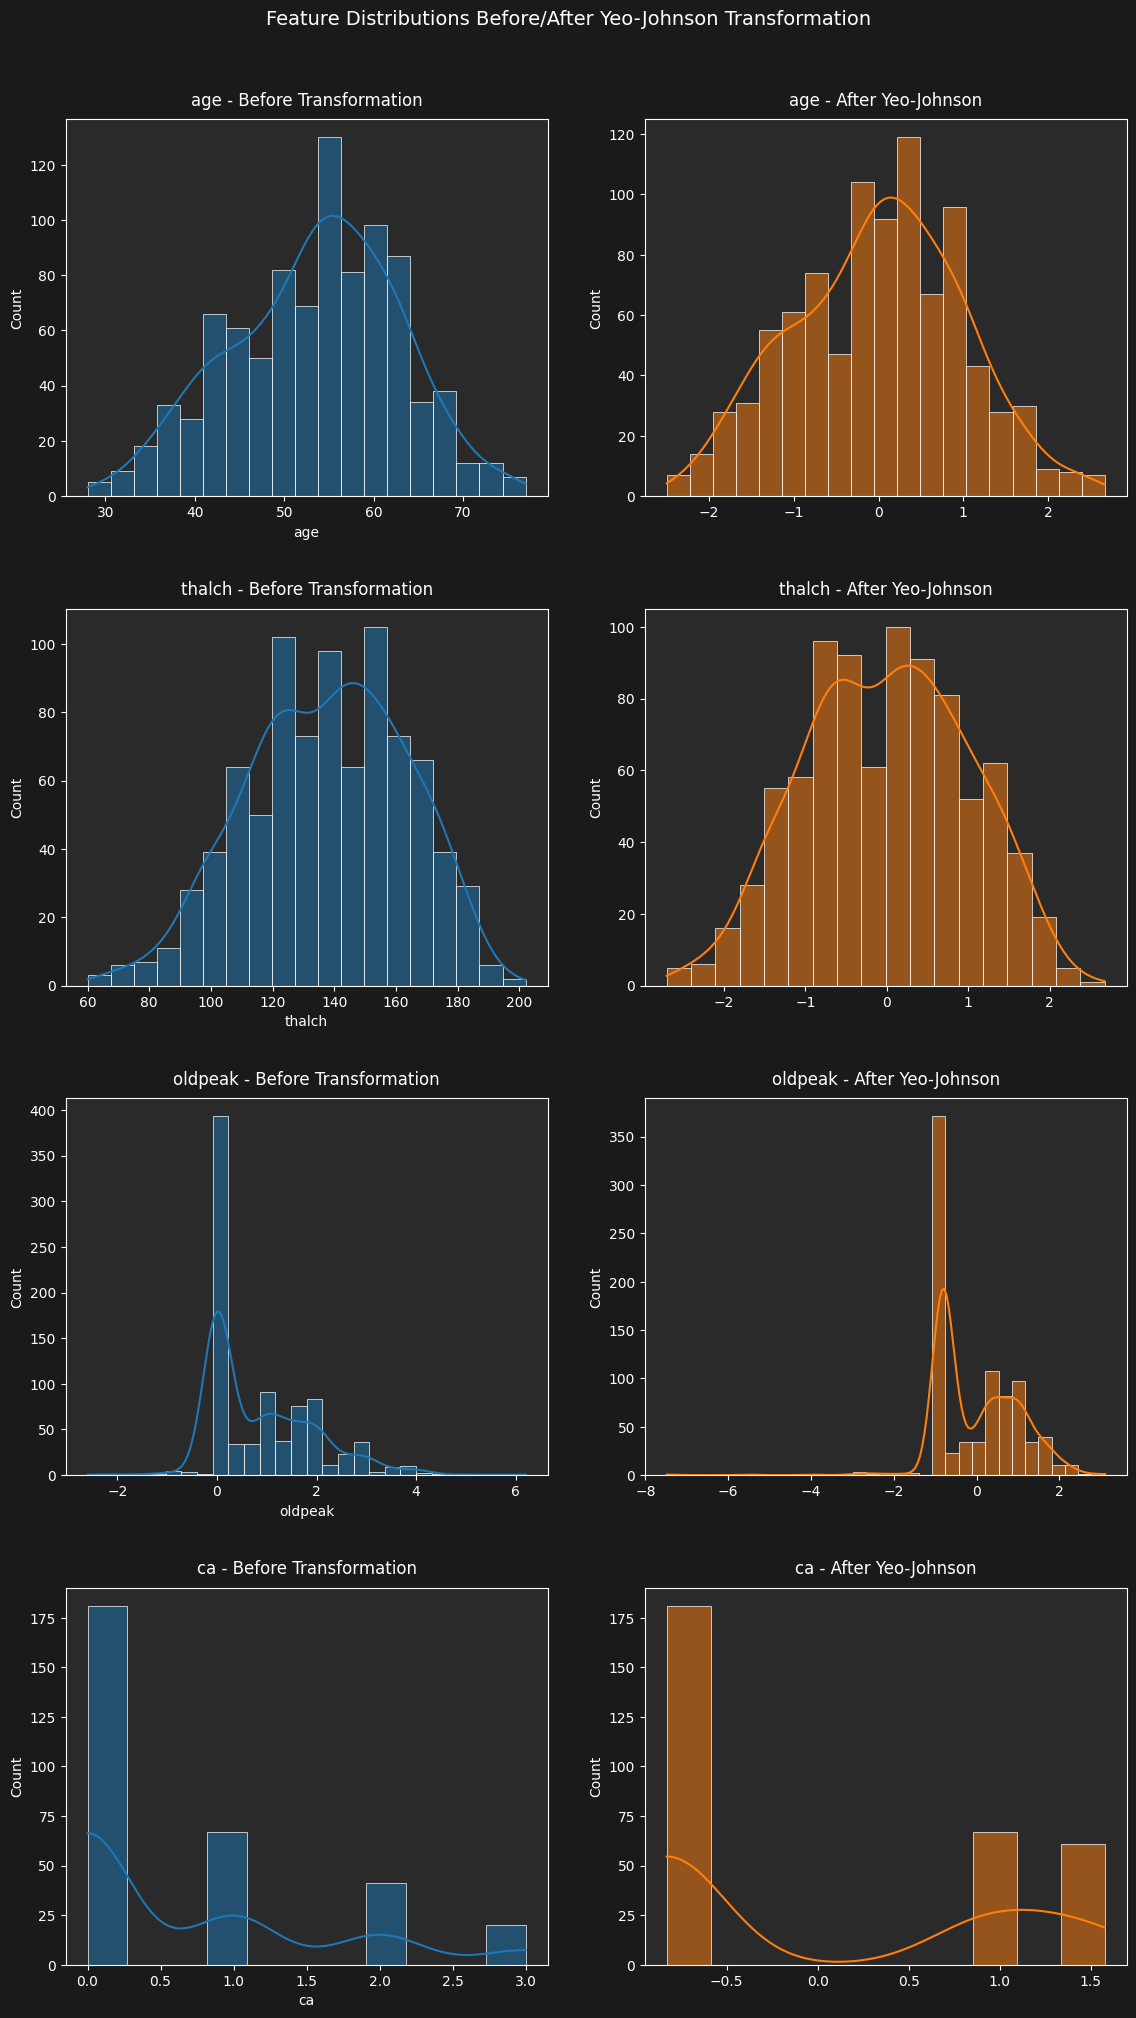

In [9]:
# Set dark theme
plt.style.use('dark_background')

# Create subplots
req_cols = [col for col in numerical_cols if col not in missing_numerical_cols_mcar]
n = len(req_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 5 * n), facecolor='#1a1a1a')

pt = PowerTransformer(method='yeo-johnson')

for i, col in enumerate(req_cols):
    # Before transformation
    sns.histplot(df[col], ax=axes[i, 0], kde=True, color='#1f77b4', edgecolor='w', linewidth=0.5)
    axes[i, 0].set_title(f'{col} - Before Transformation', color='white', pad=10)
    axes[i, 0].set_facecolor('#2a2a2a')
    
    # After transformation
    transformed = pt.fit_transform(df[[col]])
    sns.histplot(transformed.flatten(), ax=axes[i, 1], kde=True, color='#ff7f0e', edgecolor='w', linewidth=0.5)
    axes[i, 1].set_title(f'{col} - After Yeo-Johnson', color='white', pad=10)
    axes[i, 1].set_facecolor('#2a2a2a')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.suptitle('Feature Distributions Before/After Yeo-Johnson Transformation', 
             y=1.02, color='white', fontsize=14)
plt.show()

##### For Oldpeak Column

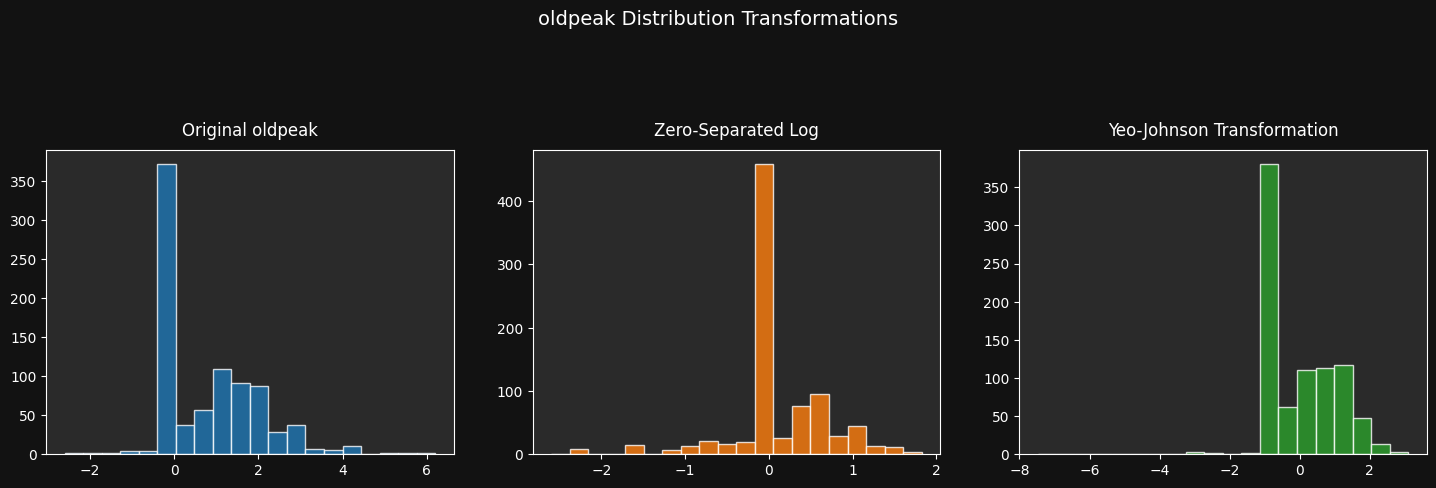

In [10]:
# Set dark theme
plt.style.use('dark_background')

# Create a copy for transformation
df['oldpeak_log'] = df['oldpeak'].copy()
mask = df['oldpeak'] > 0  # only positive values
df.loc[mask, 'oldpeak_log'] = np.log(df.loc[mask, 'oldpeak'])

# Compare histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='#121212')

# Custom colors for dark theme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Original distribution
axes[0].hist(df['oldpeak'], bins=20, color=colors[0], edgecolor='white', alpha=0.8)
axes[0].set_title('Original oldpeak', color='white', pad=10)
axes[0].set_facecolor('#2a2a2a')

# Log-transformed (zero-separated)
axes[1].hist(df['oldpeak_log'], bins=20, color=colors[1], edgecolor='white', alpha=0.8)
axes[1].set_title('Zero-Separated Log', color='white', pad=10)
axes[1].set_facecolor('#2a2a2a')

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['oldpeak_yeojohnson'] = pt.fit_transform(df[['oldpeak']])
axes[2].hist(df['oldpeak_yeojohnson'], bins=20, color=colors[2], edgecolor='white', alpha=0.8)
axes[2].set_title('Yeo-Johnson Transformation', color='white', pad=10)
axes[2].set_facecolor('#2a2a2a')

# Add super title
plt.suptitle('oldpeak Distribution Transformations', y=1.02, color='white', fontsize=14)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

##### For ca column

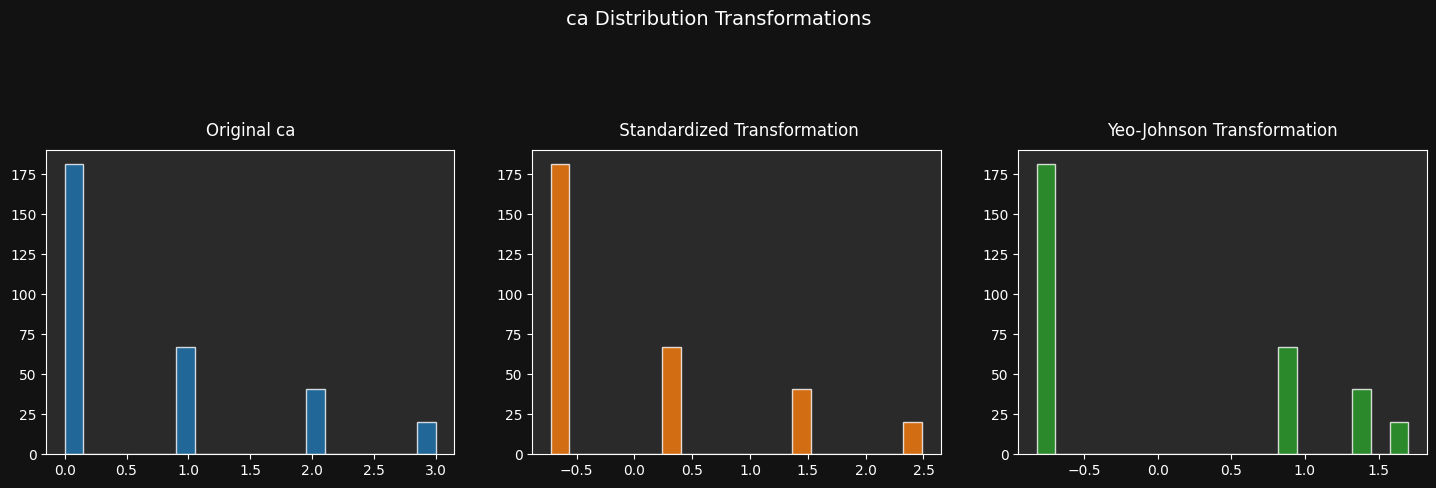

In [11]:
# Apply log transformer to the ca column 

# Set dark theme
plt.style.use('dark_background')

# Compare histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='#121212')

# Custom colors for dark theme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Original distribution
axes[0].hist(df['ca'], bins=20, color=colors[0], edgecolor='white', alpha=0.8)
axes[0].set_title('Original ca', color='white', pad=10)
axes[0].set_facecolor('#2a2a2a')

# Apply Standardization 
scaler = StandardScaler()
df['ca_standardized'] = scaler.fit_transform(df[['ca']])
axes[1].hist(df['ca_standardized'], bins=20, color=colors[1], edgecolor='white', alpha=0.8)
axes[1].set_title(' Standardized Transformation', color='white', pad=10)
axes[1].set_facecolor('#2a2a2a')

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['ca_yeojohnson'] = pt.fit_transform(df[['ca_standardized']])
axes[2].hist(df['ca_yeojohnson'], bins=20, color=colors[2], edgecolor='white', alpha=0.8)
axes[2].set_title('Yeo-Johnson Transformation', color='white', pad=10)
axes[2].set_facecolor('#2a2a2a')

# Add super title
plt.suptitle('ca Distribution Transformations', y=1.02, color='white', fontsize=14)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

#### Analysing with the columns in <i>'categorical_cols_mcar'</i>

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a new column for the NaN values
for col in categorical_cols_mcar:
    df[f'{col}_nan'] = df[col].isnull().astype(int)

# Create a figure with two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['Before Imputation', 'After Imputation'])

# Loop through each column and create a count plot
for col in categorical_cols_mcar:
    # Before imputation
    counts_before = df[col].value_counts()
    fig.add_trace(go.Bar(x=counts_before.index, y=counts_before.values), row=1, col=1)
    
    # Impute missing values with the most frequent value
    most_frequent_value = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_value)
    
    # After imputation
    counts_after = df[col].value_counts()
    fig.add_trace(go.Bar(x=counts_after.index, y=counts_after.values), row=1, col=2)

# Update the layout
fig.update_layout(height=400, width=1500, template='plotly_dark', showlegend=False)

# Show the plot
fig.show()

#### Analysing with the columns in 'categorical_cosl_most_missing'

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Binary encoding for fbs and exang (keep NaNs)
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

# Ordinal encoding for slope (keep NaNs)
slope_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
)
df[['slope']] = slope_encoder.fit_transform(df[['slope']])

# One-hot encoding for thal (drop NaNs temporarily so they stay NaN later)
thal_dummies = pd.get_dummies(df['thal'], prefix='thal', dummy_na=True)
df = pd.concat([df.drop(columns=['thal']), thal_dummies], axis=1)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.utils.validation import check_is_fitted

class LogTransformer(OneToOneFeatureMixin, TransformerMixin, BaseEstimator):
    def __init__(self):
        self._estimator_type = "transformer"
    
    def fit(self, X, y=None):
        """No fitting required"""
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = np.array(X.columns)
        return self
    
    def transform(self, X):
        """Apply log(1 + x) transformation"""
        if isinstance(X, pd.DataFrame):
            return np.log1p(X)
        return np.log1p(X)
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        if hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        return input_features

class ZeroToNanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        """Learn and store the feature names"""
        if isinstance(X, pd.DataFrame):
            if self.columns is None:
                self.columns = X.select_dtypes(include=np.number).columns.tolist()
            self.feature_names_in_ = np.array(X.columns)
            self.n_features_in_ = len(self.feature_names_in_)
        return self
    
    def transform(self, X):
        """Replace zeros with NaN in specified columns"""
        check_is_fitted(self)
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            X[self.columns] = X[self.columns].replace(0, np.nan)
            return X
        raise TypeError("Input must be a pandas DataFrame")
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        check_is_fitted(self)
        if hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        return input_features

class RandomCategoryImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, random_state=42):
        self.columns = columns
        self.random_state = random_state
    
    def fit(self, X, y=None):
        """Learn and store the feature names"""
        if isinstance(X, pd.DataFrame):
            if self.columns is None:
                self.columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
            self.categories_ = {col: X[col].dropna().unique() for col in self.columns}
            self.feature_names_in_ = np.array(X.columns)
            self.n_features_in_ = len(self.feature_names_in_)
        return self
    
    def transform(self, X):
        """Impute missing values with random categories"""
        check_is_fitted(self)
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            np.random.seed(self.random_state)
            for col in self.columns:
                mask = X[col].isna()
                if mask.any() and len(self.categories_[col]) > 0:
                    X.loc[mask, col] = np.random.choice(
                        self.categories_[col],
                        size=mask.sum()
                    )
            return X
        raise TypeError("Input must be a pandas DataFrame")
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        check_is_fitted(self)
        if hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        return input_features

class ZeroSeparatedLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        """Learn and store the feature names"""
        if isinstance(X, pd.DataFrame):
            if self.columns is None:
                self.columns = X.select_dtypes(include=np.number).columns.tolist()
            self.feature_names_in_ = np.array(X.columns)
            self.n_features_in_ = len(self.feature_names_in_)
        return self
    
    def transform(self, X):
        """Apply log transformation to positive values only"""
        check_is_fitted(self)
        X_log = X.copy()
        if isinstance(X_log, pd.DataFrame):
            for col in self.columns:
                mask = X_log[col] > 0
                X_log.loc[mask, col] = np.log(X_log.loc[mask, col])
            return X_log
        raise TypeError("Input must be a pandas DataFrame")
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        check_is_fitted(self)
        if hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        return input_features

class NanOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, drop='first'):
        self.drop = drop
        self.encoder = OneHotEncoder(drop=self.drop, handle_unknown='ignore', sparse_output=False)
    
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
    
    def transform(self, X):
        # Get one-hot encoded output
        encoded = self.encoder.transform(X)
        
        # Replace all-zero rows (unseen/missing) with np.nan
        encoded[(encoded == 0).all(axis=1)] = np.nan
        return encoded
"""
How NanOneHotEncoder Works:
1. First applies standard OneHotEncoder with:
   - drop='first' (drops first category to avoid multicollinearity)
   - handle_unknown='ignore' (returns all zeros for unseen categories)
   - sparse_output=False (returns dense array)

2. Then post-processes the output to:
   - Convert all-zero rows (from ignored unseen categories) → np.nan
   - Keep existing np.nan values as np.nan
   - Normal one-hot encoded categories remain as 0/1 values

3. Why this matters:
   - Preserves missingness information for downstream KNNImputer
   - Handles both missing values (np.nan) AND unseen categories consistently
   - Output is no longer strictly one-hot (contains np.nan), but works for imputation
"""

class SafeBinaryToFloat(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # handle sparse input coming from previous steps (e.g., OHE)
        if sparse.issparse(X):
            X = X.toarray()
        # True/False -> 1.0/0.0; NaN preserved
        return X.astype(float)

class RandomNormalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, random_state=42, clip_range=None):
        """
        Impute missing values using random normal distribution with column-wise statistics.
        
        Parameters:
        -----------
        columns : list
            Column names to impute
        random_state : int, optional (default=42)
            Seed for reproducibility
        clip_range : tuple (min, max), optional
            Constrain imputed values to this range
        """
        self.columns = columns
        self.random_state = random_state
        self.clip_range = clip_range
        
    def fit(self, X, y=None):
        """Compute mean and std for each column"""
        if isinstance(X, pd.DataFrame):
            self.stats_ = {
                col: (X[col].mean(skipna=True), X[col].std(skipna=True))
                for col in self.columns
            }
            self.feature_names_in_ = np.array(X.columns)
            self.n_features_in_ = len(self.feature_names_in_)
        return self
    
    def transform(self, X):
        """Impute missing values with clipped/rounded normal values"""
        check_is_fitted(self)
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            np.random.seed(self.random_state)
            
            for col in self.columns:
                mask = X[col].isna()
                if mask.any():
                    mean_val, std_val = self.stats_[col]
                    # Generate values with proper index alignment
                    imputed_vals = pd.Series(
                        np.random.normal(mean_val, std_val * 1.1, size=mask.sum()),
                        index=X[mask].index
                    )
                    
                    # Apply constraints if specified
                    if self.clip_range:
                        imputed_vals = imputed_vals.clip(*self.clip_range)
                    if X[col].dtype.kind in ['i', 'u']:  # Integer columns
                        imputed_vals = imputed_vals.round().astype(X[col].dtype)
                        
                    X.loc[mask, col] = imputed_vals
                    
            return X
        raise TypeError("Input must be a pandas DataFrame")
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        check_is_fitted(self)
        if hasattr(self, 'feature_names_in_'):
            return self.feature_names_in_
        return input_features

In [17]:
# ---- FIXED: NaN-safe encoders that accept NumPy arrays ----
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np
import pandas as pd

class OrdinalEncoderWithNaN(BaseEstimator, TransformerMixin):
    def __init__(self, categories):
        self.categories = categories
        self._placeholder = '__MISSING__'

    def _ensure_2d(self, X):
        # Accept DataFrame/Series/ndarray; return 2D ndarray of dtype object
        if isinstance(X, pd.Series):
            X = X.to_frame()
        if isinstance(X, pd.DataFrame):
            return X.astype(object).values
        X = np.asarray(X, dtype=object)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return X

    def _fill_and_mask(self, X):
        X2 = self._ensure_2d(X).astype(object)
        mask = pd.isna(X2)
        X_filled = X2.copy()
        X_filled[mask] = self._placeholder
        return X_filled, mask

    def fit(self, X, y=None):
        X_filled, _ = self._fill_and_mask(X)
        self.encoder_ = OrdinalEncoder(
            categories=self.categories,
            handle_unknown='use_encoded_value',
            unknown_value=-1
        )
        self.encoder_.fit(X_filled)
        return self

    def transform(self, X):
        X_filled, mask = self._fill_and_mask(X)
        X_enc = self.encoder_.transform(X_filled).astype(float)
        # restore NaNs where originals were NaN
        X_enc[mask] = np.nan
        return X_enc


class OneHotEncoderWithNaN(BaseEstimator, TransformerMixin):
    def __init__(self, drop='first'):
        self.drop = drop
        self._placeholder = '__MISSING__'

    def _ensure_2d(self, X):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        if isinstance(X, pd.DataFrame):
            return X.astype(object).values
        X = np.asarray(X, dtype=object)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return X

    def _fill_and_mask(self, X):
        X2 = self._ensure_2d(X).astype(object)
        mask = pd.isna(X2)
        X_filled = X2.copy()
        X_filled[mask] = self._placeholder
        return X_filled, mask

    def fit(self, X, y=None):
        X_filled, mask = self._fill_and_mask(X)
        self.encoder_ = OneHotEncoder(
            drop=self.drop, handle_unknown='ignore', sparse_output=False
        )
        self.encoder_.fit(X_filled)

        # compute per-input-column output slices to set NaNs back later
        cats = self.encoder_.categories_
        drop_idx = getattr(self.encoder_, 'drop_idx_', None)
        widths = []
        for j, catlist in enumerate(cats):
            w = len(catlist)
            if drop_idx is not None and drop_idx[j] is not None:
                w -= 1
            elif drop_idx is None and (self.drop == 'first' or self.drop == 'if_binary'):
                # sklearn stores computed drop in drop_idx_, but be defensive
                w -= 1
            widths.append(max(w, 0))
        starts = np.cumsum([0] + widths[:-1])
        self._col_slices_ = [slice(s, s+w) for s, w in zip(starts, widths)]
        return self

    def transform(self, X):
        X_filled, mask = self._fill_and_mask(X)
        Z = self.encoder_.transform(X_filled).astype(float)
        # set blocks to NaN where the original feature was NaN
        for j, sl in enumerate(self._col_slices_):
            if sl.stop - sl.start > 0:  # skip zero-width blocks
                Z[mask[:, j], sl] = np.nan
        return Z
    
    

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/PROJECT/HEART%20DISEASE/heart_disease_uci.csv')

In [131]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [25]:

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']

trf1 = ColumnTransformer([
    ('cat', Pipeline([
        ('to_string', FunctionTransformer(lambda x: x.astype(str))),
        ('impute', SimpleImputer(strategy='most_frequent'))
    ]), ['restecg']),

    ('num', Pipeline([
        ('zero_nan', ZeroToNanTransformer(columns=['chol', 'trestbps'])),
        ('impute', RandomNormalImputer(columns=['chol', 'trestbps'])),
        ('log', ZeroSeparatedLogTransformer(columns=['oldpeak'])),
        ('yeo_johnson', PowerTransformer(method='yeo-johnson'))
    ]), numerical_cols)
], remainder='passthrough')

# --- Stage 2: trf2 ---
ordinal_cols_after_trf1 = [9, 12]  # Update according to output of trf1
onehot_cols_after_trf1 = [13, 8]

# ---- trf2 using NaN-safe encoders; indices are after trf1 ----
trf2 = ColumnTransformer([
    ('ordinal_encode', OrdinalEncoderWithNaN(
        categories=[
            ['flat', 'upsloping', 'downsloping'],            # slope
            ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']  # cp
        ]
    ), [12, 9]),  # [slope, cp] in this order to match categories

    ('onehot_encode', OneHotEncoderWithNaN(drop='first'), [0, 13, 8, 7]),  # restecg, thal, dataset, sex
    
    ('binary_to_float', SafeBinaryToFloat(), [10, 11]),  # fbs, exang
    
], remainder='passthrough')

# ---- full pipeline (your trf1 kept intact) ----
full_pipeline = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# --- Usage ---
X_trf2 = full_pipeline.fit_transform(df.drop(columns=['id','num']))
X_trf2


array([[2.0, 3.0, 0.0, ..., 0.45819869071577973, 1.2927096013194068,
        -0.8283266878477735],
       [0.0, 0.0, 0.0, ..., -1.1397197499084923, 0.42425951258630895,
        1.5764460098810262],
       [0.0, 0.0, 0.0, ..., -0.36443619675403083, 1.5576511586631703,
        1.3797368288645413],
       ...,
       [nan, 0.0, 0.0, ..., -1.4214887381566925, -0.3092361541768839,
        nan],
       [nan, 0.0, 0.0, ..., nan, nan, nan],
       [nan, 2.0, 0.0, ..., -1.6614463820446117, -0.3092361541768839,
        nan]], shape=(920, 20), dtype=object)

In [19]:
def get_trf1_feature_names(trf1, original_columns):
    """Return a list of column names after a ColumnTransformer pipeline (trf1)."""
    output_features = []

    for name, transformer, cols in trf1.transformers_:
        if name == 'remainder' and transformer == 'passthrough':
            # Add the passthrough columns
            if transformer == 'passthrough':
                passthrough_cols = [c for i, c in enumerate(original_columns) if i not in sum([list(range(len(cols))) for _, _, cols in trf1.transformers_ if _ != 'remainder'], [])]
                output_features.extend(passthrough_cols)
        else:
            if hasattr(transformer, 'named_steps'):
                # If it’s a Pipeline, use the last step
                last_step = list(transformer.named_steps.keys())[-1]
                step = transformer.named_steps[last_step]
                if hasattr(step, 'get_feature_names_out'):
                    names = step.get_feature_names_out(cols)
                else:
                    names = cols
            elif hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(cols)
            else:
                names = cols
            output_features.extend(names)

    return output_features

# Usage
X_trf1 = trf1.fit_transform(df.drop(columns=['id', 'num']))
cols_after_trf1 = get_trf1_feature_names(trf1, df.drop(columns=['id','num']).columns)
print(cols_after_trf1)


['restecg', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex', 'dataset', 'cp', 'fbs', 'exang', 'slope', 'thal']


##### 1️⃣ `slope` (Slope of the peak exercise ST segment)
- **Most relevant columns** for imputing missing values in `slope`:
  - `oldpeak` (ST depression induced by exercise)
  - `thalch` (maximum heart rate achieved)
  - `cp` (chest pain type)
  - `exang` (exercise induced angina)
  - `restecg` (resting electrocardiographic results)

These columns are physiologically related to exercise performance and ST segment changes, so similarity in these will help the KNN imputer make better guesses.

---

##### 2️⃣ `exang` (Exercise induced angina: 1 = yes, 0 = no)
- **Most relevant columns** for imputing missing values in `exang`:
  - `thalch` (maximum heart rate achieved)
  - `oldpeak` (ST depression induced by exercise)
  - `slope` (slope of the peak exercise ST segment)
  - `cp` (chest pain type)
  - `age` (since angina likelihood changes with age)

These columns reflect cardiovascular stress indicators and are closely tied to the presence or absence of exercise-induced angina.

---
💡 **Note:**  
Before applying `KNNImputer`, ensure all categorical variables (like `cp`, `restecg`, `slope`, `thal`, `exang`) are encoded into numerical values.  
Also, normalize/scale the data so that distance-based similarity is calculated fairly.


In [ ]:
for cols in categorical_cols_most_missing:
    print(f"Column : {cols} Missing values: {df[cols].isna().sum()}")

Column : fbs Missing values: 90
Column : thal Missing values: 486
Column : slope Missing values: 309
Column : exang Missing values: 55


In [ ]:
missing_rows = df[df['fbs'].isna()]
missing_rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
330,331,38,Female,Hungary,atypical angina,120.0,275.0,NaN,normal,129.0,False,0.0,NaN,NaN,NaN,0
384,385,46,Male,Hungary,non-anginal,150.0,163.0,NaN,normal,116.0,False,0.0,NaN,NaN,NaN,0
410,411,49,Male,Hungary,asymptomatic,120.0,297.0,NaN,normal,132.0,False,1.0,flat,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
447,448,54,Female,Hungary,atypical angina,140.0,309.0,NaN,st-t abnormality,140.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,53,Male,VA Long Beach,asymptomatic,154.0,0.0,NaN,st-t abnormality,140.0,True,1.5,flat,NaN,NaN,2
781,782,61,Male,VA Long Beach,asymptomatic,110.0,0.0,NaN,normal,108.0,True,2.0,downsloping,NaN,NaN,2
782,783,57,Male,VA Long Beach,asymptomatic,130.0,311.0,NaN,st-t abnormality,148.0,True,2.0,flat,NaN,NaN,1
785,786,69,Male,VA Long Beach,non-anginal,140.0,0.0,NaN,st-t abnormality,118.0,False,2.5,downsloping,NaN,NaN,2


In [ ]:
for cols in numerical_cols:
    correlation = df[[cols, 'num']].corr().iloc[0,1]
    print(f"Column : {cols} Correlation: {correlation:.2f}") #Pearson's r


Column : age Correlation: 0.34
Column : trestbps Correlation: 0.14
Column : chol Correlation: 0.07
Column : thalch Correlation: -0.37
Column : oldpeak Correlation: 0.44


In [ ]:
X = df[categorical_cols + numerical_cols]
y = df['num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.loc[:, categorical_cols + numerical_cols]

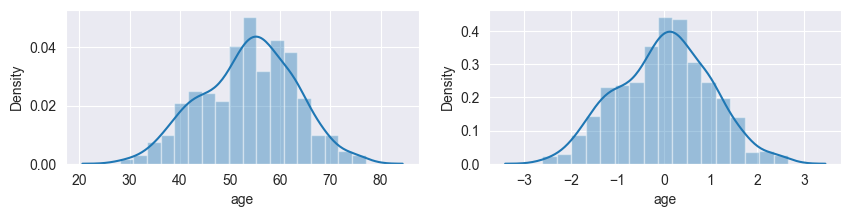

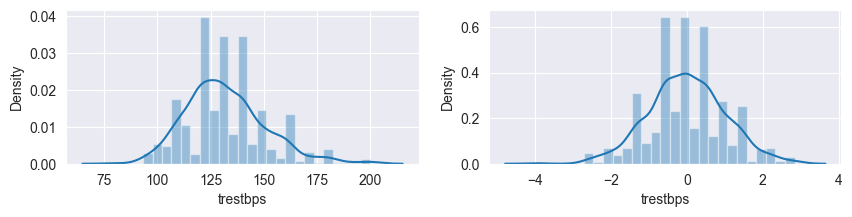

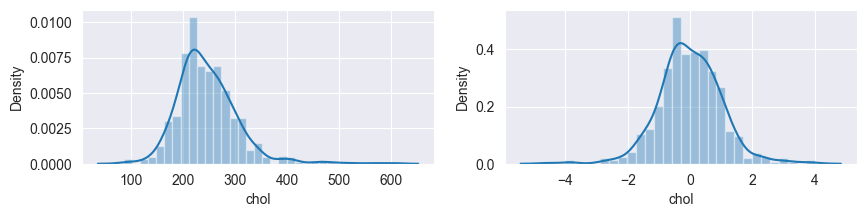

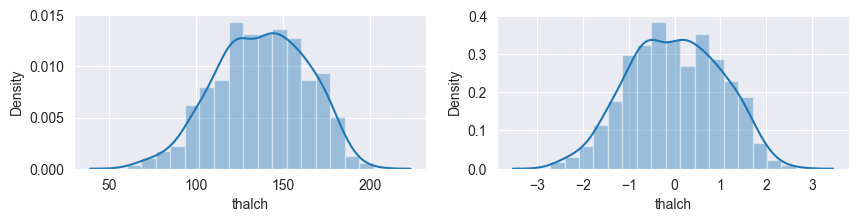

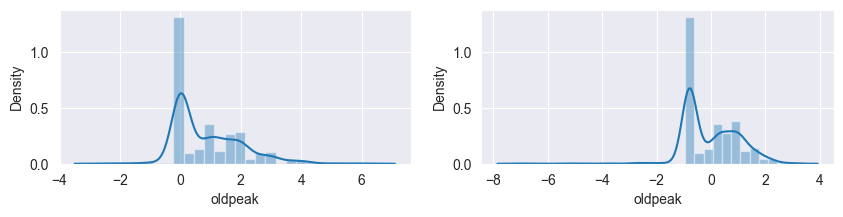

In [ ]:
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

X_train_pt = transformer.fit_transform(X_train[numerical_cols])
X_train_lg = LogTransformer().fit_transform(X_train[numerical_cols])

lambda_df = pd.DataFrame({'cols': numerical_cols, 'box_cox_lambdas': transformer.lambdas_})
X_train_pt_df = pd.DataFrame(X_train_pt, columns=numerical_cols)


for cols in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))
    sns.distplot(X_train[cols], ax=axs[0])
    sns.distplot(X_train_pt_df[cols], ax=axs[1])
    plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('trf6', trf6),
    ('trf7', trf7),
    ('model', LinearRegression())
])
# output = pipe.fit(X_train)
# transformed_X = output.transform(X_train)
# transformed_X

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

#print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


R2 Score: 0.3812


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=5)
print(scores.mean())


-0.13652109240709112


<Axes: xlabel='trestbps', ylabel='Density'>

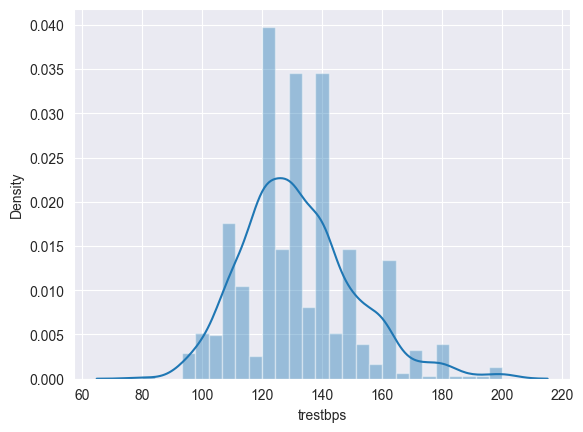

In [ ]:
sns.distplot(X_train[X_train['trestbps'] != 0]['trestbps'], label='Before imputation')

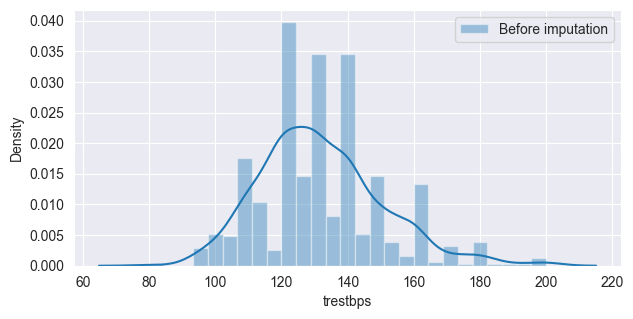

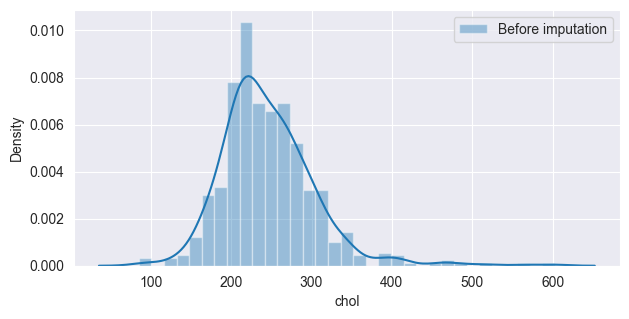

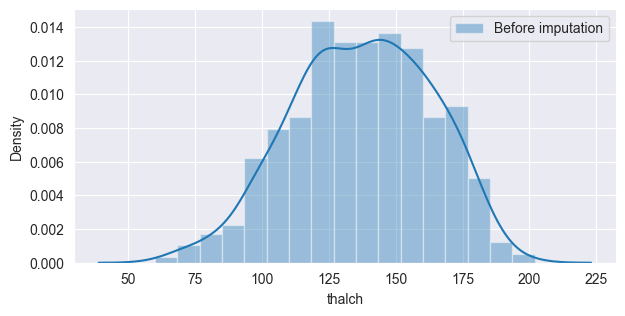

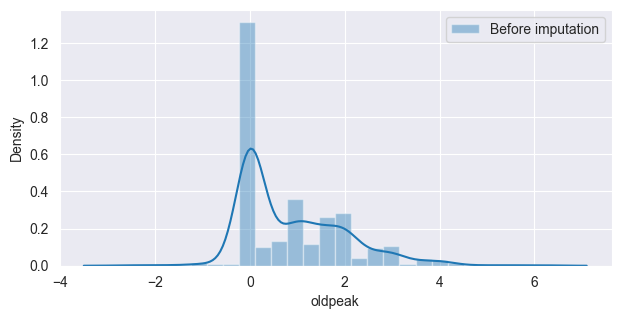

In [ ]:
numerical_cols_mcar = ['trestbps', 'chol', 'thalch', 'oldpeak']
    
import seaborn as sns
for cols in numerical_cols_mcar:


    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    sns.distplot(X_train[cols], label='Before imputation')
    # sns.distplot(output['cat__exang'], label='After imputation')
    # plt.title('Exang Distribution')

    # plt.subplot(2, 2, 2)
    # sns.distplot(X_train['restecg'].value_counts(), label='Before imputation')
    # sns.distplot(output['cat__restecg'].value_counts(), label='After imputation')
    # plt.title('Restecg Distribution')

    # plt.subplot(2, 2, 3)
    # sns.distplot(X_train['thal'].value_counts(), label='Before imputation')
    # sns.distplot(output['remainder__thal'].value_counts(), label='After imputation')
    # plt.title('Thal Distribution')

    plt.tight_layout()
    plt.legend()
plt.show()

In [ ]:
is_zero = X_train[X_train['chol'] == 0].shape[0]
total = X_train['chol'].dropna().shape[0]
percentage = (is_zero / total) * 100
percentage

0.0

NameError: name 'output' is not defined

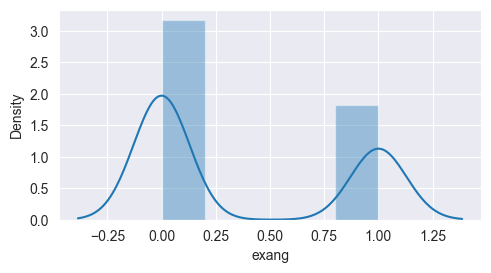

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.distplot(X_train['exang'], label='Before imputation')
sns.distplot(output['cat__exang'], label='After imputation')
plt.title('Exang Distribution')

plt.subplot(2, 2, 2)
sns.distplot(X_train['restecg'].value_counts(), label='Before imputation')
sns.distplot(output['cat__restecg'].value_counts(), label='After imputation')
plt.title('Restecg Distribution')

plt.subplot(2, 2, 3)
sns.distplot(X_train['thal'].value_counts(), label='Before imputation')
sns.distplot(output['remainder__thal'].value_counts(), label='After imputation')
plt.title('Thal Distribution')

plt.tight_layout()
plt.legend()
plt.show()

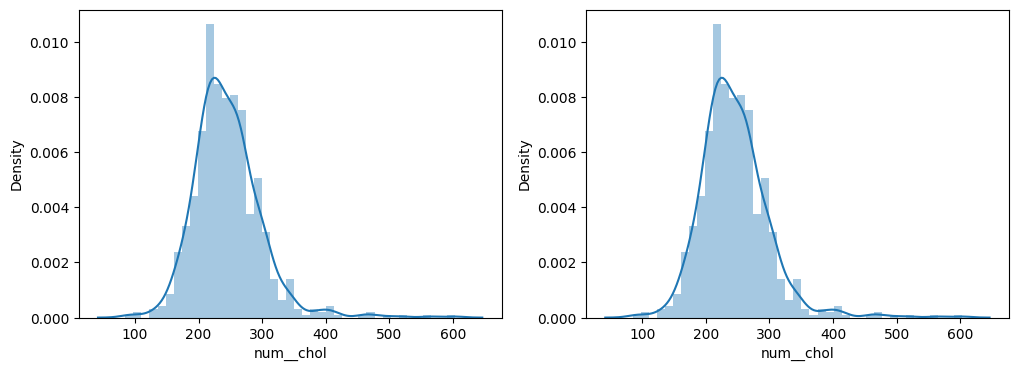

In [ ]:
import seaborn as sns 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_step2['num__chol'])
plt.subplot(1, 2, 2)
sns.distplot(X_step3['num__chol'])

plt.show()

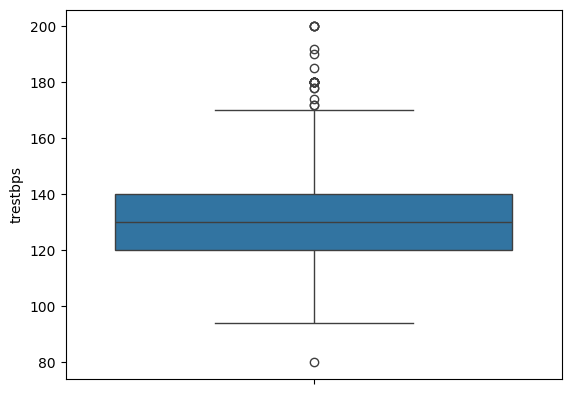

In [ ]:
sns.boxplot(X_train['trestbps'])
plt.show()

In [ ]:
import pandas as pd
import json

# JSON data (could also load from file using json.load())
insurance_json = [
  {"pid": 1, "tiv_2015": 10, "tiv_2016": 5, "lat": 10, "lon": 10},
  {"pid": 2, "tiv_2015": 20, "tiv_2016": 20, "lat": 20, "lon": 20},
  {"pid": 3, "tiv_2015": 10, "tiv_2016": 30, "lat": 20, "lon": 20},
  {"pid": 4, "tiv_2015": 10, "tiv_2016": 40, "lat": 40, "lon": 40}
]


# Convert JSON to DataFrame
df = pd.DataFrame(insurance_json)

df['location'] = df['lat'].astype(str) + ', ' + df['lon'].astype(str)

# Step 1: Identify duplicate 'location' values
duplicate_mask = df.duplicated(subset=['lat', 'lon'], keep=False)

# Step 2: Filter out ALL rows where 'lat_lon' is duplicated (both original and duplicates)
filtered_df = df[~duplicate_mask]

x = filtered_df.groupby('tiv_2015')['tiv_2016'].sum()
result_df = x.to_frame()

result_df

import pandas as pd

def find_investments(df: pd.DataFrame) -> pd.DataFrame:
    df['location'] = df['lat'].astype(str) + ', ' + df['lon'].astype(str)
    duplicate_mask = df.duplicated(subset=['location'], keep='first')
    total_sum = df[~duplicate_mask]['tiv_2016'].sum()
    return pd.DataFrame({'tiv_2016': [total_sum]})

,tiv_2016
tiv_2015,
10,45
